# PROCESSO DE SELECAO: PPROJETO CURUPIRA



### Bibliotecas:


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

## Pré-processamento de dados:


In [58]:
df=pd.read_csv('./iris.csv', sep=',')
df.head(10)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


####     Conferir se há dados nulos:

In [59]:
df.isnull().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

#### Conferir a quantidade de dados por espécie:

In [60]:
df.groupby(['species']).count()

,sepalLength,sepalWidth,petalLength,petalWidth
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


### Organizando os dados de treino e teste:

In [61]:
X=df.drop(['species'],axis=1)
Y= df['species']
X.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [63]:
X_K=np.array(X)
Y_K=np.array(Y)

##### *substituindo o nome das espécies para números:*

In [64]:
for i in np.arange(Y_K.shape[0]):
    if(Y_K[i] == "setosa"):
        Y_K[i] = '0'
    elif(Y_K[i] == "versicolor"):
        Y_K[i] = '1'
    else:
        Y_K[i] = '2'

## Modelo: Árvore de decisão

### Utilizando o método K-fold

In [65]:
N = X_K.shape[0]
K = 10 # Numeros de folds
preds_fold = np.array(['' for i in range(N)])
folds = np.random.randint(0, K, size=N)

clf = tree.DecisionTreeClassifier()

In [66]:
for idx in np.arange(K): # range(0,k=10)
    X_train = X_K[folds != idx,:]
    Y_train = Y_K[folds != idx]
    X_test = X_K[folds == idx,:]
    
    model = clf.fit(X_train, Y_train)
    
    preds_fold[folds == idx] = clf.predict(X_test)

In [67]:
acuracia = accuracy_score(preds_fold,Y_K)
print("%.2f"%acuracia)
matrizcf = confusion_matrix(preds_fold,Y_K)
print(matrizcf)

0.94
[[50  0  0]
 [ 0 45  4]
 [ 0  5 46]]


#### Resultado: Acurácia de 95%

#### Introduzindo resultados visuais:

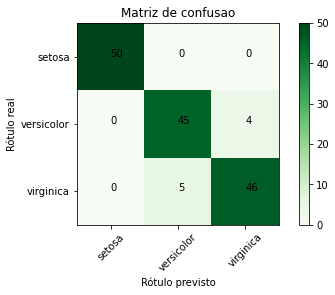

In [68]:
import matplotlib.pyplot as plt
import itertools

cm = matrizcf
cmap=plt.cm.Greens
normalize = False
classes =  ["setosa","versicolor","virginica"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Matriz de confusao')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt))

plt.tight_layout()
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
plt.show()